In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


data = pd.read_csv('penguins.csv')
data = data.dropna()

feature = data[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
label = data['species']

feature_encoded = feature.copy()

feature_encoded['island'] = feature_encoded['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen': 2})
feature_encoded['sex'] = feature_encoded['sex'].map({'Male': 0, 'Female': 1})




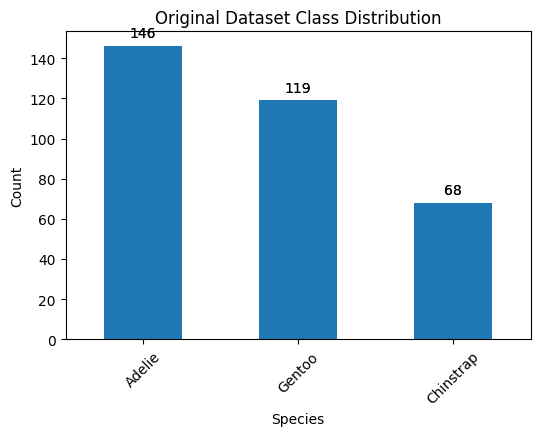

In [41]:

plt.figure(figsize=(6,4))
ax = label.value_counts().plot(kind='bar')

label.value_counts().plot(kind='bar')
plt.title("Original Dataset Class Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.tick_params(axis = 'x', rotation = 45)

for p in ax.patches:  
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center',  
                xytext=(0, 9),  
                textcoords='offset points')
plt.show()


In [42]:
split_ratios = [0.4, 0.6, 0.8, 0.9]
random_state = [0, 1, 2, 3]

datasets = []


for ratio in split_ratios:
    for seed in random_state:
        feature_train, feature_test, label_train, label_test = train_test_split(
            feature_encoded, label,
            train_size = ratio,
            random_state = seed,
            shuffle = True,
            stratify = label,
        )
        
        datasets.append({
            'ratio': ratio,
            'seed': seed,
            'feature_train': feature_train,
            'feature_test': feature_test,
            'label_train': label_train,
            'label_test': label_test,
        })


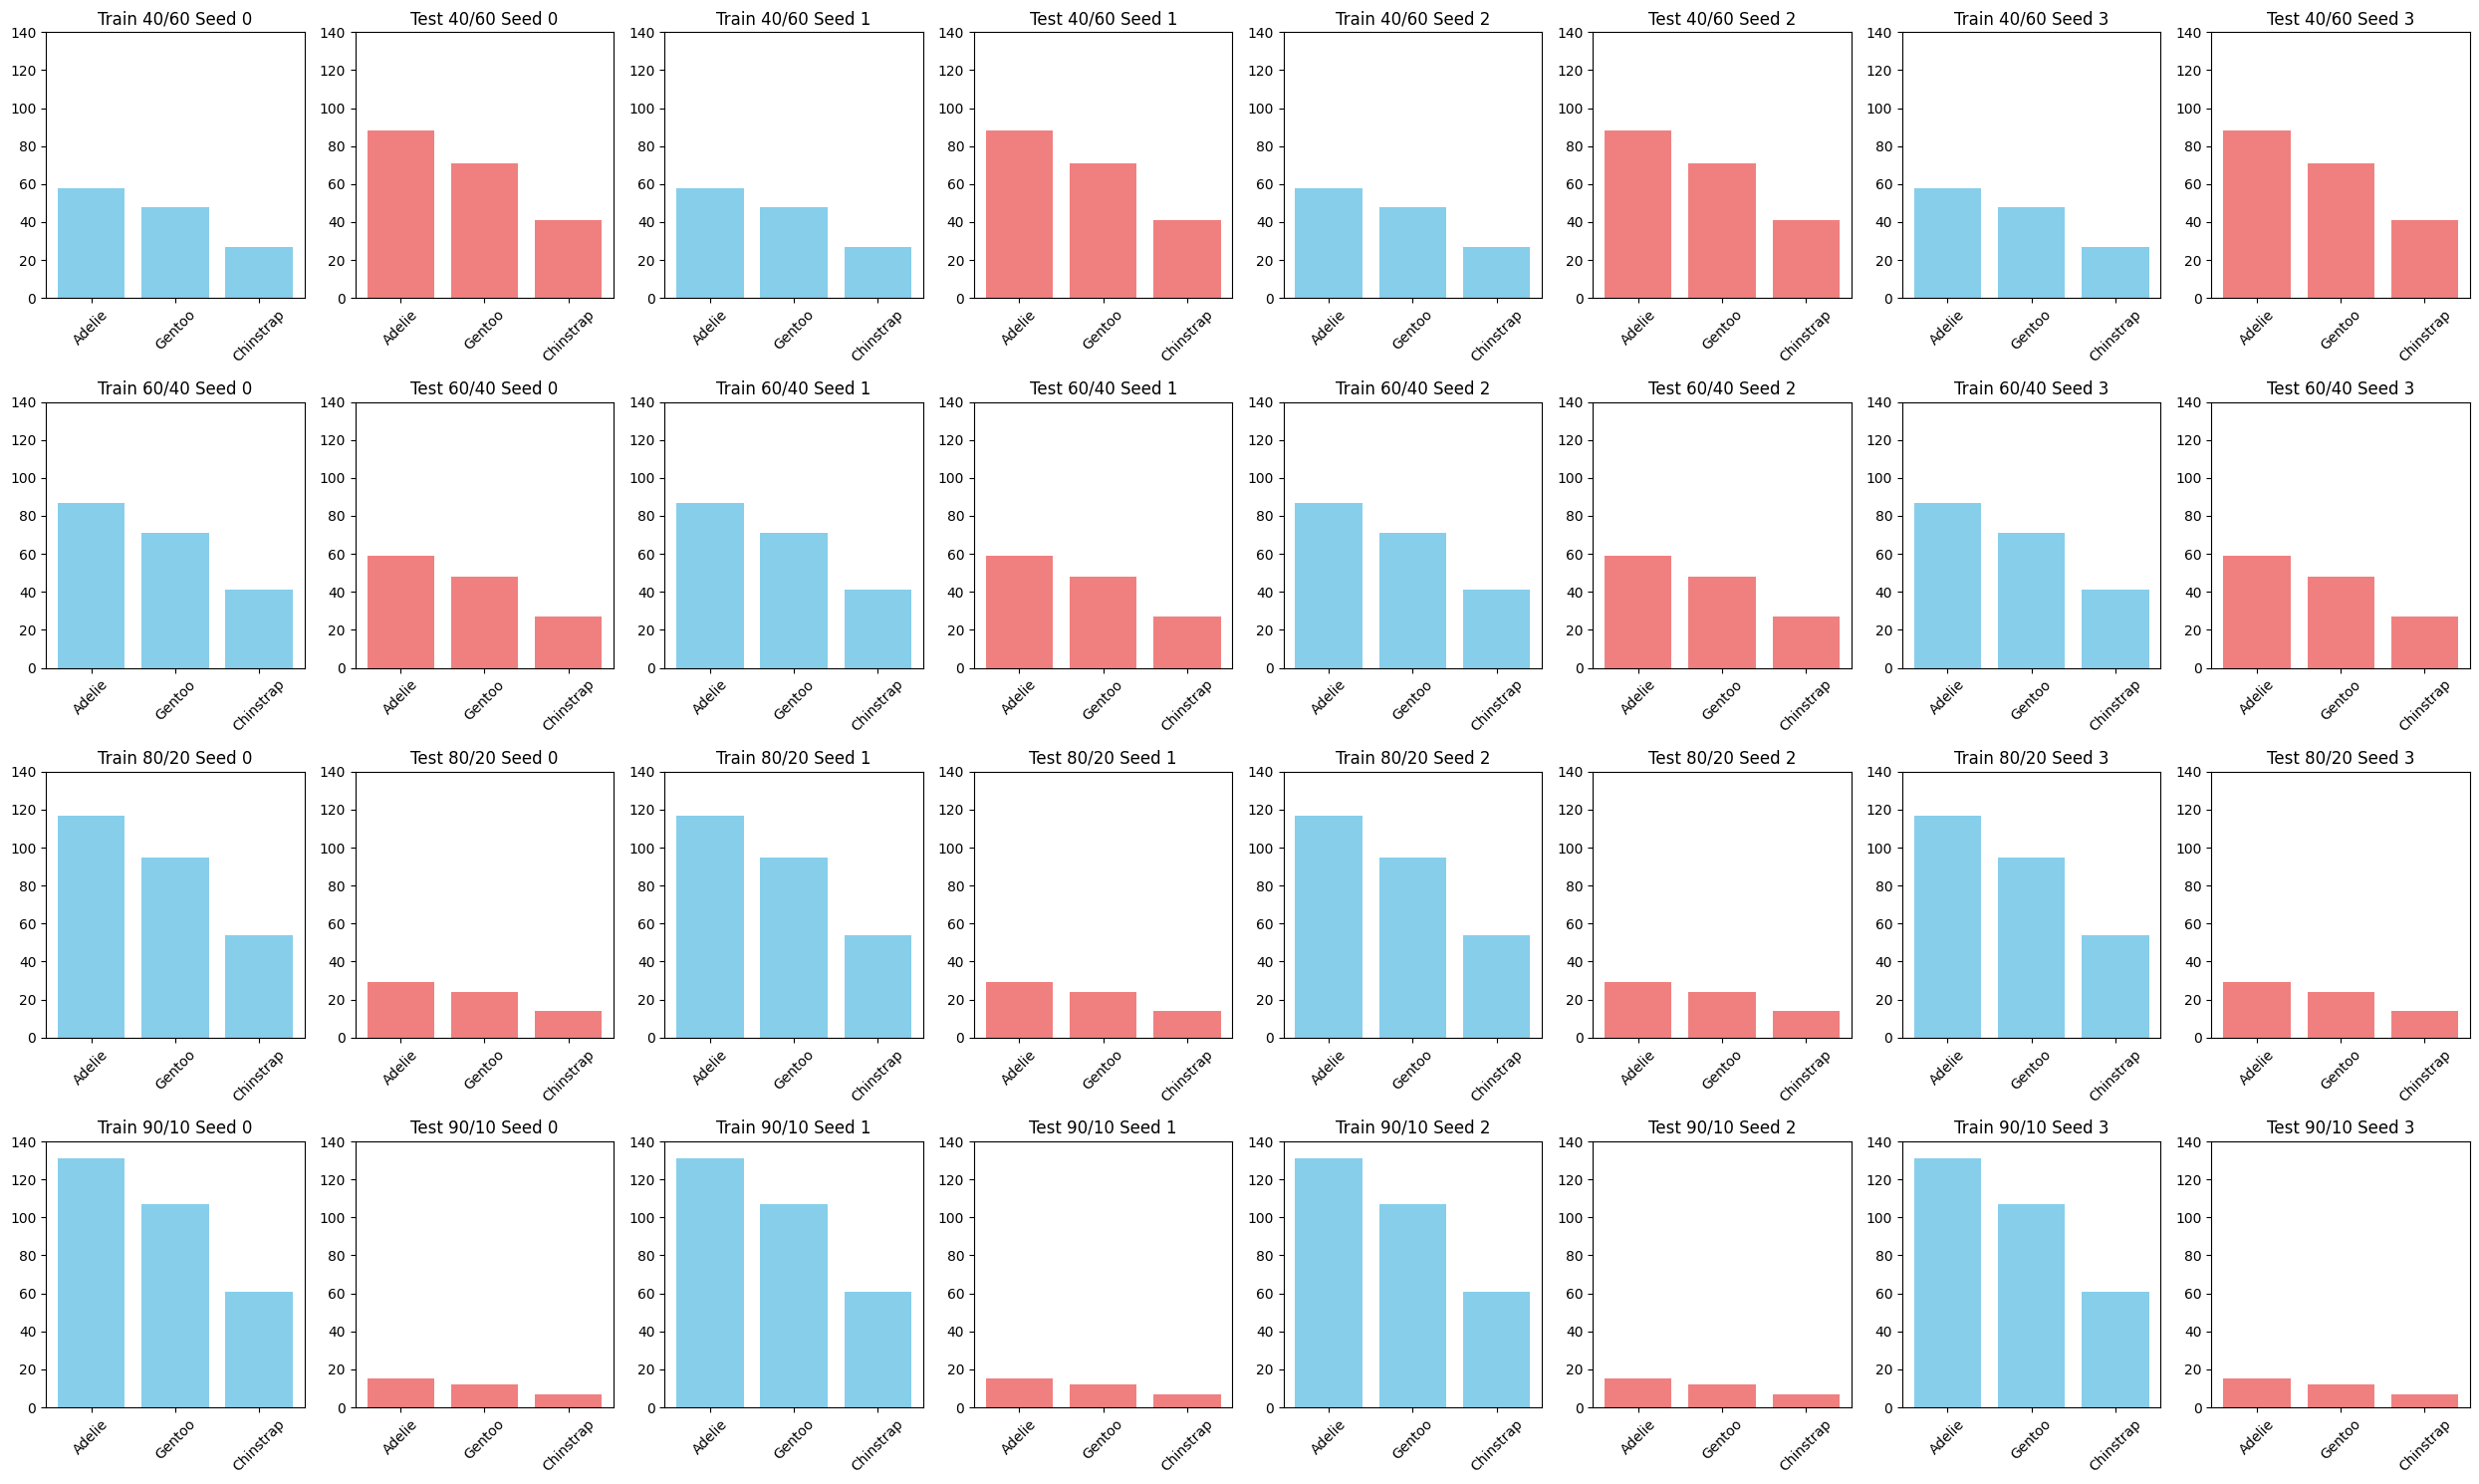

In [46]:
fig, axes = plt.subplots(len(split_ratios), len(random_state)*2, figsize=(25, 15))

for idx, dataset in enumerate(datasets):
    row = idx // len(random_state)
    col = (idx % len(random_state)) * 2

    # Training set plot
    axes[row, col].bar(dataset['label_train'].value_counts().index, dataset['label_train'].value_counts().values, color='skyblue')
    axes[row, col].set_title(f"Train {int(dataset['ratio']*100)}/{100-int(dataset['ratio']*100)} Seed {dataset['seed']}")
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylim(0, 140)

    # Testing set plot
    axes[row, col + 1].bar(dataset['label_test'].value_counts().index, dataset['label_test'].value_counts().values, color='lightcoral')
    axes[row, col + 1].set_title(f"Test {int(dataset['ratio']*100)}/{100-int(dataset['ratio']*100)} Seed {dataset['seed']}")
    axes[row, col + 1].tick_params(axis='x', rotation=45)
    axes[row, col + 1].set_ylim(0, 140)

plt.tight_layout()
plt.show()


In [47]:
for i, example in enumerate(datasets):
    # Tạo mô hình DecisionTreeClassifier với random_state là seed của bộ dữ liệu
    model = DecisionTreeClassifier(random_state=example['seed'])
    
    # Huấn luyện mô hình với dữ liệu huấn luyện
    model.fit(example['feature_train'], example['label_train'])
    
    # Dự đoán kết quả trên bộ dữ liệu kiểm tra
    y_pred = model.predict(example['feature_test'])
    
    # Tính độ chính xác của mô hình
    accuracy = accuracy_score(example['label_test'], y_pred)
    print(f"Dataset {i+1}: Accuracy ({example['ratio']} split, seed {example['seed']}):", accuracy)
    
    # In ra báo cáo phân loại (classification report)
    print(f"Classification Report for Dataset {i+1}:")
    print(classification_report(example['label_test'], y_pred))
    
    # Tính và hiển thị ma trận nhầm lẫn (confusion matrix)
    cm = confusion_matrix(example['label_test'], y_pred)
    
    # Vẽ ma trận nhầm lẫn dưới dạng heatmap
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix for Dataset {i+1} - Ratio {example['ratio']} Seed {example['seed']}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
    # Vẽ cây quyết định
    plt.figure(figsize=(20, 20))
    plot_tree(model, 
              feature_names=feature_encoded.columns, 
              class_names=model.classes_, 
              filled=True)
    plt.title(f"Decision Tree {i+1} - Ratio {example['ratio']}, Seed {example['seed']}")
    plt.show()



Dataset 1: Accuracy (0.4 split, seed 0): 0.98
Classification Report for Dataset 1:


NameError: name 'classification_report' is not defined